# Tutorial 2: exercise

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This tutorial exercise was generated from an Jupyter notebook.  You can download the notebook [here](t2_exercise.ipynb). Use this downloaded Jupyter notebook to fill out your responses.*

In [1]:
import pandas as pd
import altair as alt
import bokeh.io
import bokeh.plotting
import bebi103
import altair_catplot as altcat
alt.renderers.enable('notebook')
bokeh.io.output_notebook()

Loading BokehJS ...

### Exercise 1

The [Anderson-Fisher iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a classic data set used in statistical and machine learning applications. Edgar Anderson carefully measured the lengths and widths of the petals and sepals of 50 irises in each of three species, *I. setosa*, *I. versicolor*, and *I. virginica*. Ronald Fisher then used this data set to distinguish the three species from each other.

**a)** Load the data set, which you can download [here](../data/anderson-fisher-iris.csv) into a Pandas `DataFrame` called `df`. Be sure to check out the structure of the data set before loading. You will need to use the `header=[0,1]` kwarg of `pd.read_csv()` to load the data set in properly.

In [2]:
df = pd.read_csv("../data/anderson-fisher-iris.csv", header = [0,1])
df.head()

setosa                                                      \
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)   
0               5.1              3.5               1.4              0.2   
1               4.9              3.0               1.4              0.2   
2               4.7              3.2               1.3              0.2   
3               4.6              3.1               1.5              0.2   
4               5.0              3.6               1.4              0.2   

         versicolor                                                      \
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)   
0               7.0              3.2               4.7              1.4   
1               6.4              3.2               4.5              1.5   
2               6.9              3.1               4.9              1.5   
3               5.5              2.3               4.0              1.3   
4               6.5              2.8               4.6              1.5   

          virginica                                                      
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)  
0               6.3              3.3               6.0              2.5  
1               5.8              2.7               5.1              1.9  
2               7.1              3.0               5.9              2.1  
3               6.3              2.9               5.6              1.8  
4               6.5              3.0               5.8              2.2

**b)** Take a look `df`. Is it tidy? Why or why not?

It is not a tidy dataset. Tidy data may only have one observation per row, but this data has 12 observations per row! For this table to be tidy, each of these column headers would need to be an entry within a more broad colum. 

**c)** Perform the following operations to make a new `DataFrame` from the original one you loaded in exercise 1 to generate a new `DataFrame`. Do these operations one-by-one and explain what you are doing to the `DataFrame` in each one. The Pandas documentation might help.

In [3]:
df_tidy = df.stack(level=0)
df_tidy.head()

petal length (cm)  petal width (cm)  sepal length (cm)  \
0 setosa                    1.4               0.2                5.1   
  versicolor                4.7               1.4                7.0   
  virginica                 6.0               2.5                6.3   
1 setosa                    1.4               0.2                4.9   
  versicolor                4.5               1.5                6.4   

              sepal width (cm)  
0 setosa                   3.5  
  versicolor               3.2  
  virginica                3.3  
1 setosa                   3.0  
  versicolor               3.2

Given a dataframe with a multi-level column axis, `df.stack()` takes one level (here specified to be the topmost level) and converts it into an index column. Since species is now a column, other column names are no longer unique. Thus, the function essentially stacks the previously horizontally separated data on top of one another, and condenses each of the three repetitive columns to a single column.

In [4]:
df_tidy = df_tidy.sort_index(level=1)

This sorts the dataframe along an index, and `level=1` means that it will sort along the second set of indicies, which is in this case the species of the flower. Thus, the flowers are sorted by species.  

In [5]:
df_tidy = df_tidy.reset_index(level=1)

`df.reset_index()` converts the indices of a dataframe into its own column. `level=1` specifies that the second index column is the one that shall be converted. Thus, the species index column is converted to a normal column. 

In [6]:
df_tidy = df_tidy.rename(columns={'level_1': 'species'})

This simply renames the species column from the default name "level_1" to the infomative name "species". 

**d)** Is the resulting `DataFrame` tidy? Why or why not?

In [7]:
# Let's take a look
df_tidy.head()

,species,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


This dataframe is sadly still not tidy. Tidy data may only have one observation per row, but this data has four observations per row! A truly tidy dataset might have have a "flower organ" column that would include entries like "petal", and "sepal", and also a "dimension" column that included "width" and "length". 

All that said, this table is going to be absolutely fine for this analysis. 

**e)** Using `df_tidy`, slice out all of the sepal lengths for I. versicolor as a Numpy array. 

In [8]:
versicolor_sepal_lengths = df_tidy[df_tidy["species"] == "versicolor"]["sepal length (cm)"].values

### Exercise 2

**a)** Make a scatter plot of sepal width versus petal length with the glyphs colored by species.

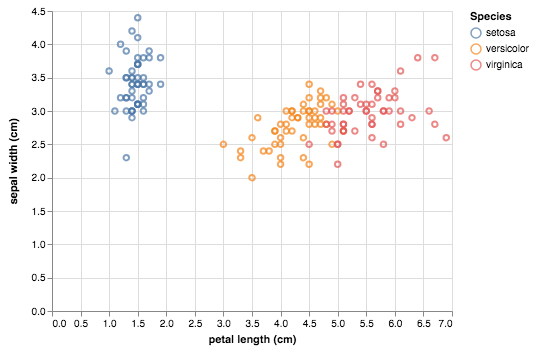

In [9]:
alt.Chart(df_tidy).mark_point().encode(x="petal length (cm):Q",
                                       y="sepal width (cm):Q",
                                       color = alt.Color("species:N", title = "Species"),
                                       tooltip = ["petal length (cm)", 
                                                  "petal width (cm)",
                                                  "sepal length (cm)",
                                                  "sepal width (cm)", 
                                                  "species"]).interactive()

**b)** Make a plot comparing the petal widths of the respective species. Comment on why you chose the plot you chose.

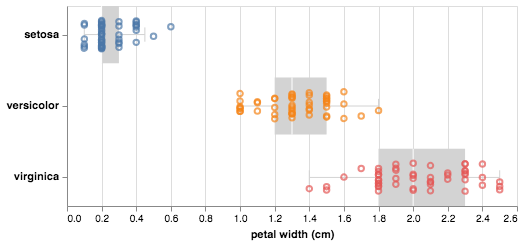

In [10]:
altcat.catplot(df_tidy,
               height=200,
               width=450,
               mark='point',
               encoding=dict(y=alt.Y('species:N', title=None),
                             x='petal width (cm):Q',
                             color=alt.Color('species:N', legend=None)),
               transform='jitterbox'
              ).configure_text(
                  fontWeight='bold'
              )

There is only one observation, so it is easiest to spread the points out along a single axis. Additionally, differences between species are easily compared if they are separated by height. Thus, I chose a jitterplot with a boxplot overlay. This plotting format ensured that all datapoints, as well as their statistical distribution could be clearly displayed and compared. Color-coding the species provided additional clarity since the jitterplot makes the height separation imprecise. 